# 🧬 Elastic Net vs 🌲 Random Forest Comparison

This notebook compares the two best-performing models from previous experiments:

- **Elastic Net** (regularized linear model)
- **Random Forest** (nonlinear ensemble of decision trees)

Evaluated per drug using 5-fold cross-validation with RMSE and R².


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

NUM_PCS = 20

# Load files
elastic = pd.read_csv(f"01_simple_baselines/results/elastic_net/elastic_net_results_{NUM_PCS}_pcs.csv").assign(Model="ElasticNet with Tissue")
rf = pd.read_csv(f"02_complex_baselines/rf/results/model_performance_summary_{NUM_PCS}_pcs.csv").assign(Model="RandomForest")
#rf = pd.read_csv(f"01_simple_baselines/results/elastic_net_2/elastic_net_results_{NUM_PCS}_pcs.csv").assign(Model="Elastic Net only pca")

# Merge
elastic_rf_df = pd.concat([elastic, rf], ignore_index=True)
elastic_rf_df.rename(columns=lambda c: c.strip().replace("²", "^2"), inplace=True)

print("✅ Shape:", elastic_rf_df.shape)
elastic_rf_df.head()


✅ Shape: (1394, 9)


,DRUG_ID,n_samples,alpha,l1_ratio,rmse_mean,rmse_std,r2_mean,r2_std,Model
0,1,391,0.01,0.1,1.074706,0.133469,0.012352,0.125905,ElasticNet with Tissue
1,3,356,1.00,0.5,1.966568,0.124481,0.026321,0.069639,ElasticNet with Tissue
2,5,394,10.00,0.1,1.490265,0.147939,0.148319,0.102795,ElasticNet with Tissue
3,6,403,1.00,0.9,0.886456,0.158810,-0.008898,0.070463,ElasticNet with Tissue
4,9,396,10.00,0.1,1.402439,0.041820,0.076281,0.042389,ElasticNet with Tissue


In [7]:
filtered_df = elastic_rf_df[
    (elastic_rf_df["rmse_mean"] <= 3.5) &
    (elastic_rf_df["r2_mean"] >= -1)
].copy()

print("🧼 Filtered shape:", filtered_df.shape)


🧼 Filtered shape: (1394, 9)


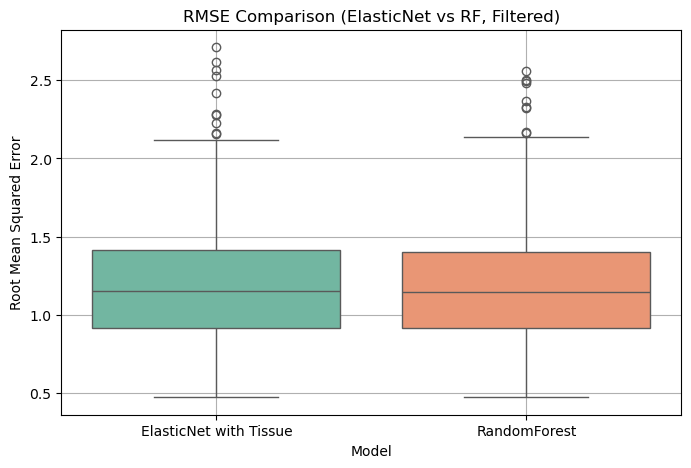

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_df, x="Model", y="rmse_mean", hue="Model", legend=False, palette="Set2")
plt.title("RMSE Comparison (ElasticNet vs RF, Filtered)")
plt.ylabel("Root Mean Squared Error")
plt.grid(True)
plt.show()


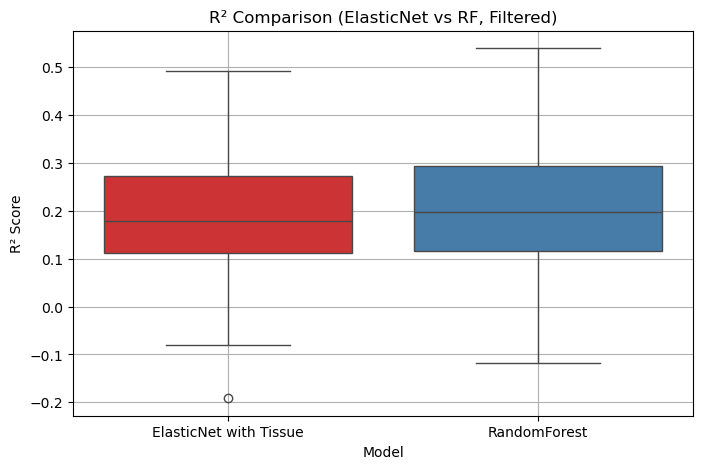

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_df, x="Model", y="r2_mean", hue="Model", legend=False, palette="Set1")
plt.title("R² Comparison (ElasticNet vs RF, Filtered)")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()


### 📌 Summary Statistics (ElasticNet vs RandomForest)


In [12]:
filtered_df.groupby("Model")[["rmse_mean", "r2_mean"]].agg(["mean", "std", "median"]).round(4)


rmse_mean                 r2_mean                
                            mean     std  median    mean     std  median
Model                                                                   
ElasticNet with Tissue    1.1926  0.3602  1.1532  0.1914  0.1058  0.1792
RandomForest              1.1792  0.3514  1.1440  0.2045  0.1185  0.1973